### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [222]:
import pandas as pd
import matplotlib.pyplot as plt

In [223]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep='\t')

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [225]:
# Crear un diccionario para almacenar los valores únicos de cada columna
unique_values = {}

# Iterar sobre las columnas del DataFrame
for column in df.columns:
    unique_values[column] = df[column].nunique()

# Mostrar los resultados
for col, unique_count in unique_values.items():
    print(f"'{col}': {unique_count} valores únicos")

'Unnamed: 0': 3107 valores únicos
'urlDrugName': 502 valores únicos
'rating': 10 valores únicos
'effectiveness': 5 valores únicos
'sideEffects': 5 valores únicos
'condition': 1426 valores únicos
'benefitsReview': 3031 valores únicos
'sideEffectsReview': 2813 valores únicos
'commentsReview': 3046 valores únicos


In [226]:
df10 = df[['rating', 'effectiveness', 'sideEffects']]


#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas

In [227]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rating         3107 non-null   int64 
 1   effectiveness  3107 non-null   object
 2   sideEffects    3107 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.9+ KB


In [228]:
df10['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [229]:
df10['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [230]:
df10['rating'].unique()

array([ 4,  1, 10,  3,  2,  9,  7,  8,  6,  5], dtype=int64)

In [231]:
df10.head()

,rating,effectiveness,sideEffects
0,4,Highly Effective,Mild Side Effects
1,1,Highly Effective,Severe Side Effects
2,10,Highly Effective,No Side Effects
3,3,Marginally Effective,Mild Side Effects
4,2,Marginally Effective,Severe Side Effects


In [232]:
# Crear un diccionario para almacenar los valores únicos de cada columna
unique_values = {}

# Iterar sobre las columnas del DataFrame
for column in df10.columns:
    unique_values[column] = df10[column].nunique()

# Mostrar los resultados
for col, unique_count in unique_values.items():
    print(f"'{col}': {unique_count} valores únicos")

'rating': 10 valores únicos
'effectiveness': 5 valores únicos
'sideEffects': 5 valores únicos


In [233]:
df10['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [234]:
# Diccionario para mapear 'effectiveness'
effectiveness_map = {
    'Highly Effective': 5,
    'Marginally Effective': 2,
    'Ineffective': 1,
    'Considerably Effective': 4,
    'Moderately Effective': 3
}

# Diccionario para mapear 'sideEffects'
side_effects_map = {
    'Mild Side Effects': 2,
    'Severe Side Effects': 4,
    'No Side Effects': 1,
    'Extremely Severe Side Effects': 5,
    'Moderate Side Effects': 3
}

# Sobrescribir las columnas originales con sus valores numéricos
df10['effectiveness'] = df10['effectiveness'].map(effectiveness_map)
df10['sideEffects'] = df10['sideEffects'].map(side_effects_map)

# Mostrar el DataFrame actualizado
print(df10)




      rating  effectiveness  sideEffects
0          4              5            2
1          1              5            4
2         10              5            1
3          3              2            2
4          2              2            4
...      ...            ...          ...
3102      10              5            2
3103       1              1            5
3104       2              2            3
3105       8              4            2
3106       4              3            3

[3107 rows x 3 columns]


C:\Users\mikel\AppData\Local\Temp\ipykernel_5392\963657617.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['effectiveness'] = df10['effectiveness'].map(effectiveness_map)
C:\Users\mikel\AppData\Local\Temp\ipykernel_5392\963657617.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['sideEffects'] = df10['sideEffects'].map(side_effects_map)


In [235]:
df10.head()

,rating,effectiveness,sideEffects
0,4,5,2
1,1,5,4
2,10,5,1
3,3,2,2
4,2,2,4


In [236]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rating         3107 non-null   int64
 1   effectiveness  3107 non-null   int64
 2   sideEffects    3107 non-null   int64
dtypes: int64(3)
memory usage: 72.9 KB


In [237]:
df10.head(10)

,rating,effectiveness,sideEffects
0,4,5,2
1,1,5,4
2,10,5,1
3,3,2,2
4,2,2,4
5,1,1,4
6,9,5,2
7,10,4,1
8,10,5,1
9,1,1,5


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

In [238]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [239]:
X = df10

In [240]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]


In [241]:
df_kmeans = pd.DataFrame(inertias, columns=['inertia'])
df_kmeans['inertia_1'] = df_kmeans['inertia'].shift(1)
df_kmeans['diff%'] = df_kmeans['inertia'] - df_kmeans['inertia_1']
df_kmeans

,inertia,inertia_1,diff%
0,35812.368201,NaN,NaN
1,11137.736724,35812.368201,-24674.631477
2,7254.022835,11137.736724,-3883.713888
3,5699.921619,7254.022835,-1554.101216
4,5121.903117,5699.921619,-578.018503
5,4234.666976,5121.903117,-887.236141
6,3877.103264,4234.666976,-357.563712
7,3345.210728,3877.103264,-531.892536
8,2981.352791,3345.210728,-363.857937


<BarContainer object of 9 artists>

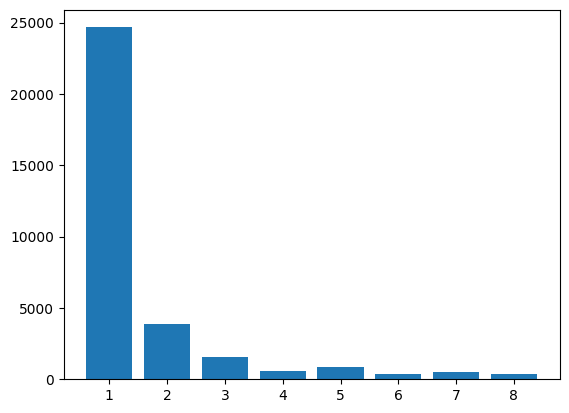

In [242]:
plt.bar(df_kmeans.index, height= -1 * df_kmeans['diff%'])

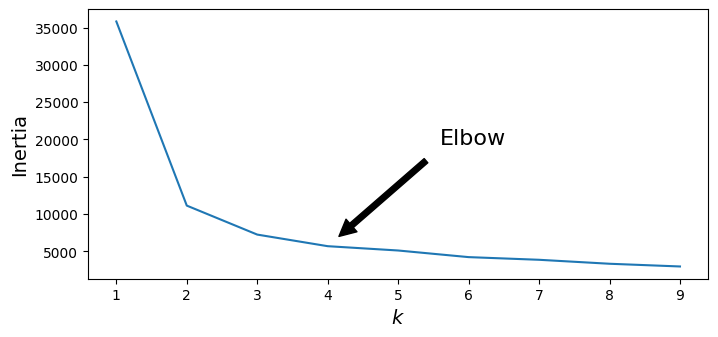

In [243]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias[0:])
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
#plt.axis([1, 8.5, 0, 1300])
# Guardar el gráfico como imagen
plt.savefig("inertia_vs_k_plot.png", format='png', dpi=300)

# Mostrar la gráfica
plt.show()

In [244]:
from sklearn.cluster import KMeans

In [245]:
from sklearn.metrics import silhouette_score

In [246]:
#silhouette_score(X, KMeans.labels_)

In [247]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

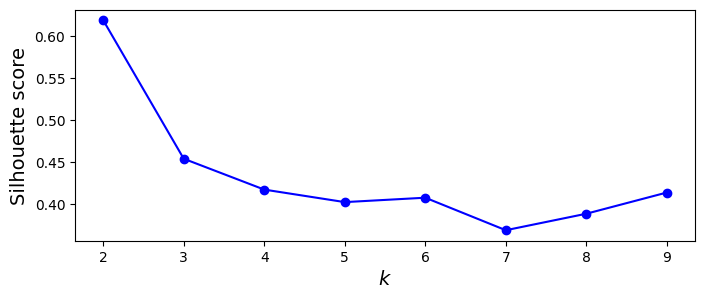

In [249]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])

plt.show()

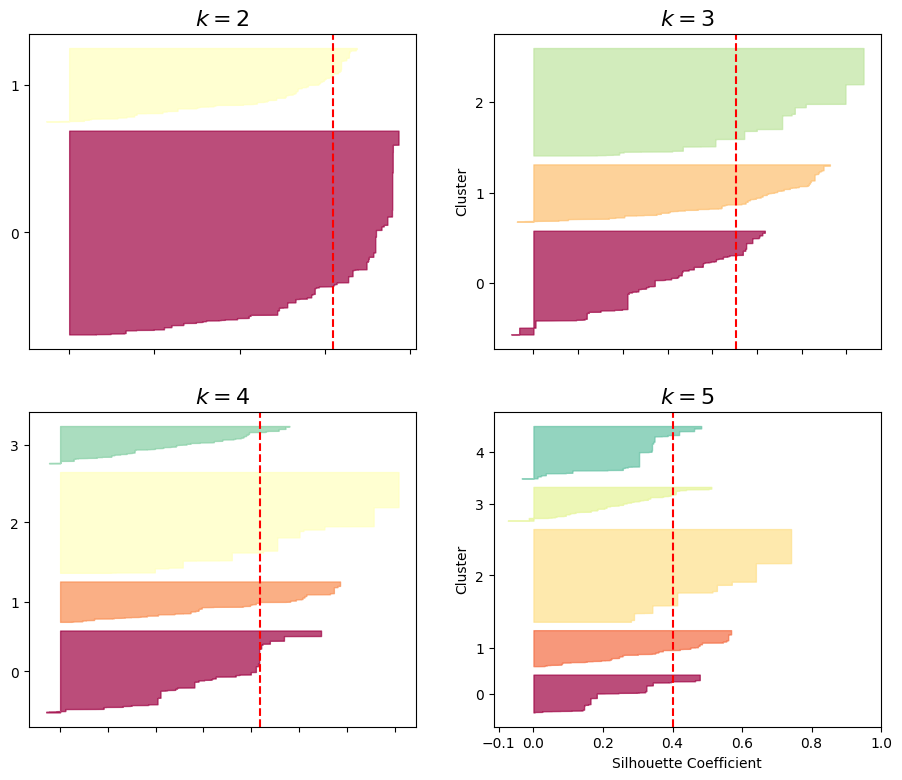

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import numpy as np

plt.figure(figsize=(11, 9))

for k in ( 2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

#### Genera el K Means 

In [ ]:
# Creamos el KMeans
from sklearn.cluster import KMeans

# Agrupa en 3 clusters
k = 2

kmeans = KMeans(n_clusters=k, random_state=101)

# Entrena solo con X
kmeans.fit(X)

# Define a que cluster pertenece cada registro
y_pred = kmeans.predict(X)

In [ ]:
import sklearn
sklearn.__version__

'1.5.2'

In [ ]:
# Predicciones
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
# Agregar los clusters al DataFrame original
df10['Cluster'] = y_pred

C:\Users\mikel\AppData\Local\Temp\ipykernel_5392\2382582443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['Cluster'] = y_pred


Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

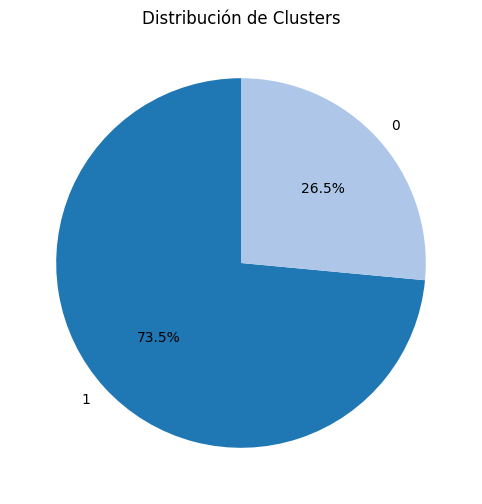

In [ ]:
# Generar gráfico de pastel para la distribución de clusters
cluster_counts = df10['Cluster'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title("Distribución de Clusters")
plt.show()

In [ ]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rating         3107 non-null   int64
 1   effectiveness  3107 non-null   int64
 2   sideEffects    3107 non-null   int64
 3   Cluster        3107 non-null   int32
dtypes: int32(1), int64(3)
memory usage: 85.1 KB


In [ ]:
df10.groupby('Cluster').describe()

rating                                                effectiveness  \
          count      mean       std  min  25%  50%   75%   max         count   
Cluster                                                                        
0         823.0  2.667072  1.570244  1.0  1.0  3.0   4.0   6.0         823.0   
1        2284.0  8.569615  1.272701  5.0  8.0  9.0  10.0  10.0        2284.0   

                   ...           sideEffects                                \
             mean  ...  75%  max       count      mean       std  min  25%   
Cluster            ...                                                       
0        2.584447  ...  4.0  5.0       823.0  3.482382  1.182545  1.0  3.0   
1        4.422504  ...  5.0  5.0      2284.0  1.880473  0.838299  1.0  1.0   

                        
         50%  75%  max  
Cluster                 
0        4.0  4.0  5.0  
1        2.0  2.0  5.0  

[2 rows x 24 columns]